<a href="https://colab.research.google.com/github/sanjayrawat2468/Health-Insurance-Sell-Prediction-Classification-/blob/main/Health_Insurance_Sell_Prediction(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Health Insurance Sell Prediction(Classification)**

**Project Type** - EDA/Regression/Classification/Unsupervised

**Contribution** - Individual

**Team Member** - Sanjay Rawat

## **GitHub Link -** - https://github.com/sanjayrawat2468/Health-Insurance-Sell-Prediction-Classification-.git

# **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Data Description**

**1 - Id** : Unique ID for the customer

**2 - Gender** : Gender of the customer

**3 - Age** : Age of the customer

**4 - Driving_License 0 :** Customer does not have DL, **1 :** Customer already has DL

**5 - Region_Code :** Unique code for the region of the customer

**6 - Previously_Insured :** **1 :** Customer already has Vehicle Insurance, **0 :** Customer doesn't have Vehicle Insurance

**7 - Vehicle_Age :** Age of the Vehicle

**8 - Vehicle_Damage :1 :** Customer got his/her vehicle damaged in the past. **0 :** Customer didn't get his/her vehicle damaged in the past.

**9 - Annual_Premium :** The amount customer needs to pay as premium in the year

**10 - PolicySalesChannel :** Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

**11 - Vintage :** Number of Days, Customer has been associated with the company

**12 - Response : 1 :** Customer is interested, **0 :** Customer is not interested

# **1 - Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# **2 - Mounting The Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3 - Reading File**

In [3]:
path = '/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
df = pd.read_csv(path)

# **4 - Playing With Dataset**

In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317303 entries, 0 to 317302
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    317303 non-null  int64  
 1   Gender                317303 non-null  object 
 2   Age                   317302 non-null  float64
 3   Driving_License       317302 non-null  float64
 4   Region_Code           317302 non-null  float64
 5   Previously_Insured    317302 non-null  float64
 6   Vehicle_Age           317302 non-null  object 
 7   Vehicle_Damage        317302 non-null  object 
 8   Annual_Premium        317302 non-null  float64
 9   Policy_Sales_Channel  317302 non-null  float64
 10  Vintage               317302 non-null  float64
 11  Response              317302 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 29.1+ MB


In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,317303.00000,317302.000000,317302.000000,317302.000000,317302.000000,317302.000000,317302.000000,317302.000000,317302.000000
mean,158652.00000,38.813421,0.997870,26.393048,0.458015,30548.857010,112.124147,154.361671,0.122952
std,91597.63057,15.496456,0.046108,13.231129,0.498235,17231.163388,54.144039,83.644507,0.328383
min,1.00000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,79326.50000,25.000000,1.000000,15.000000,0.000000,24396.000000,29.000000,82.000000,0.000000
50%,158652.00000,36.000000,1.000000,28.000000,0.000000,31652.000000,133.500000,154.000000,0.000000
75%,237977.50000,49.000000,1.000000,35.000000,1.000000,39377.000000,152.000000,227.000000,0.000000
max,317303.00000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**We have 4 numeric and 5 categorical independent features & Our dependent feature is a categorical column**


In [7]:
# Checking for null values 

df.isnull().sum()

id                      0
Gender                  0
Age                     1
Driving_License         1
Region_Code             1
Previously_Insured      1
Vehicle_Age             1
Vehicle_Damage          1
Annual_Premium          1
Policy_Sales_Channel    1
Vintage                 1
Response                1
dtype: int64

In [8]:
# We can see that some of the features containing null value and count is low as compare to dataset so we can remove them

df=df.dropna()

In [9]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
df.shape

(317302, 12)

# **5 - Target variable**


Here Response is our target variable from the dataset





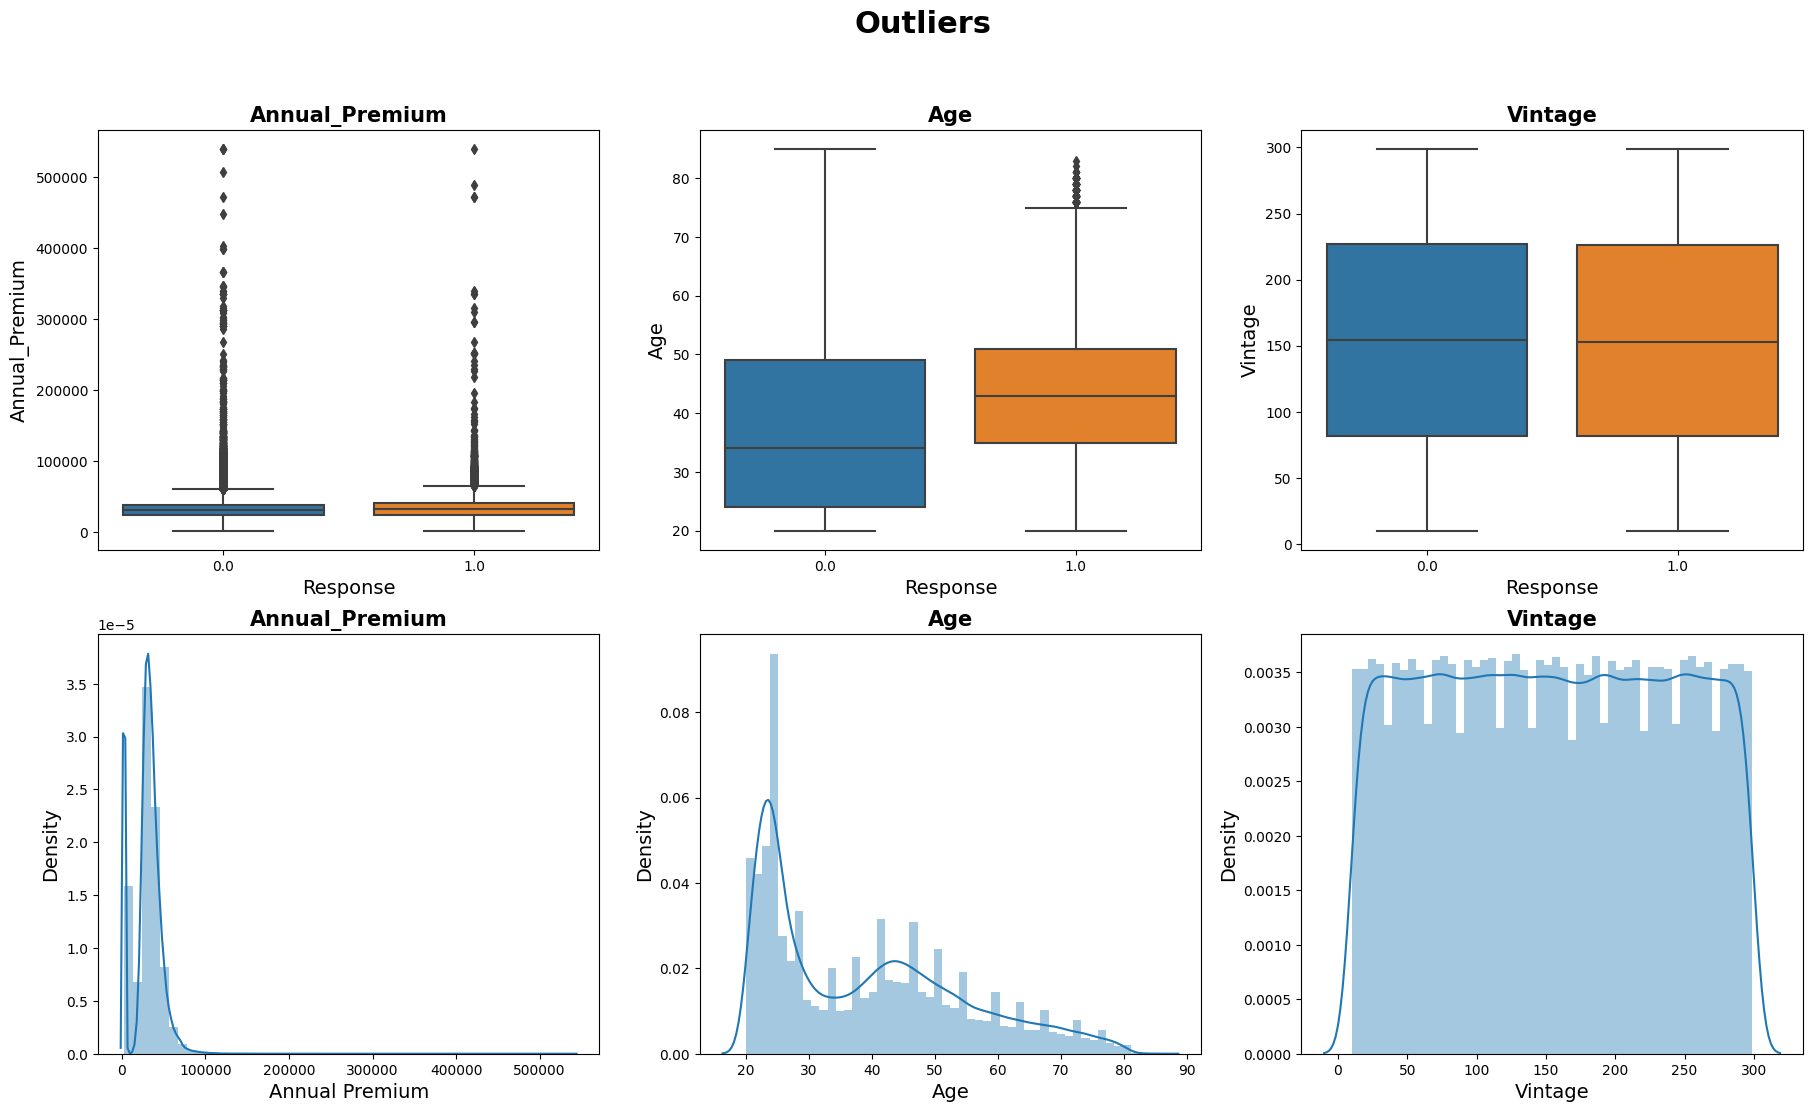

In [11]:
#Lets Plot the graphs for other features with respect to our target variable and find out the imbalanced data or outliers

def show_outliers(df):
  #Created a function for comapring all the data together 

    fig, axes = plt.subplots(2, 3, figsize=(22,12))

    sns.boxplot(ax = axes[0][0],y = 'Annual_Premium',x = 'Response', data = df)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][1],y = 'Age',x = 'Response', data = df)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
    axes[0][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][2],y = 'Vintage',x = 'Response', data = df)
    axes[0][2].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})


    sns.distplot(ax = axes[1][0],x = df['Annual_Premium'])
    axes[1][0].set_xlabel(xlabel = 'Annual Premium', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][1],x = df['Age'])
    axes[1][1].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][2],x = df['Vintage'])
    axes[1][2].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Outliers', fontsize = 22, fontweight = 'bold' )


show_outliers(df)

**From the above plot it can be implied that Annual Premium has a poitively skewed distribution, also depict that Vintage has a approximatly uniform distribution & Age columns has some outliers.**


# **6 - Outlier Treatment and Normalization**

**Treating outliers for annual premium using Interquartile method and for Normalization using MinMaxScaler method below.**

In [12]:
#Applying IQR method

Q1=df['Annual_Premium'].quantile(0.25)
Q3=df['Annual_Premium'].quantile(0.75)
IQR=Q3-Q1

Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
df['Annual_Premium_Treated'] = np.where(df['Annual_Premium']>Upper_Whisker, Upper_Whisker, df['Annual_Premium'])

In [13]:
#Applying MinMaxScaler method

scaler = MinMaxScaler()
df['Annual_Premium_Treated'] = scaler.fit_transform(df['Annual_Premium_Treated'].values.reshape(-1,1))

Text(0.5, 1.0, 'Annual Premium Treated')

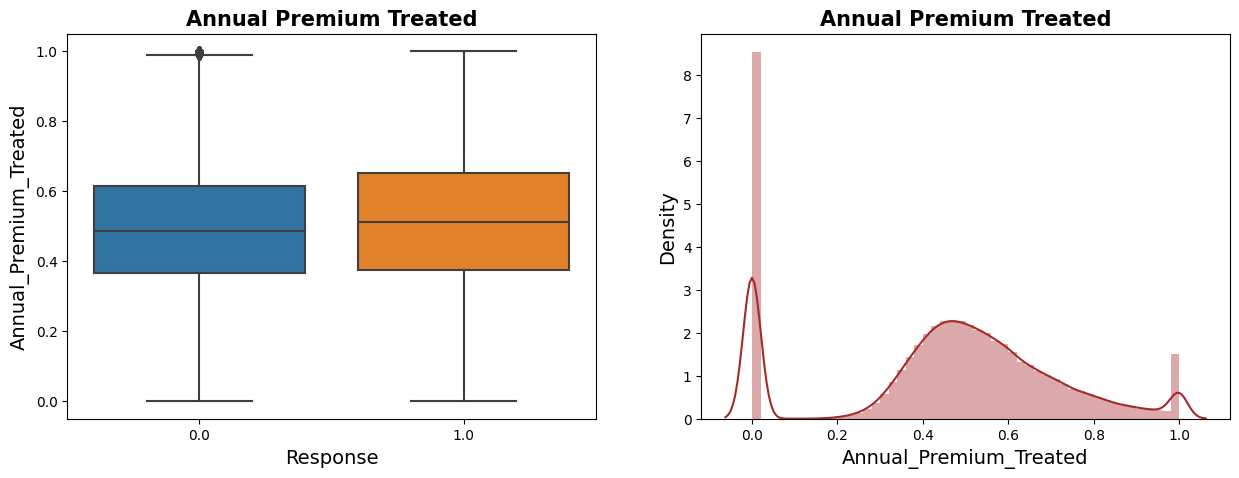

In [14]:

fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], y = 'Annual_Premium_Treated',x = 'Response', data = df)
axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
axes[0].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})

sns.distplot(ax = axes[1], x = df['Annual_Premium_Treated'], color='brown')
axes[1].set_xlabel(xlabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
axes[1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
axes[1].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})

**From the above plots we can see that there are no more outliers in Annual Premium.**


# **7 - Exploratory Data Analysis**

Text(0.5, 1.0, 'Response V/S Gender')

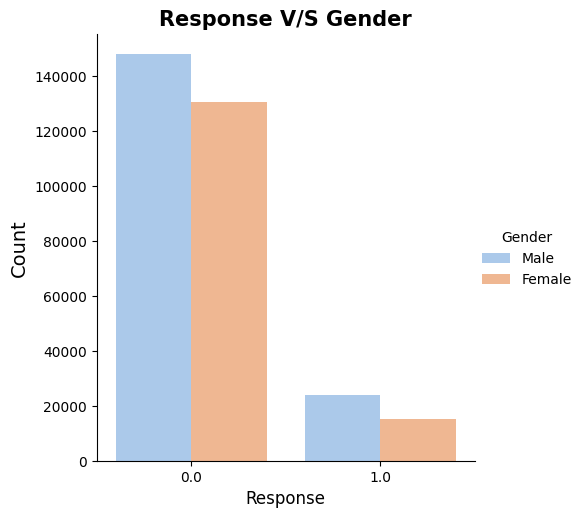

In [15]:
# Lets find out the gender distribution

sns.catplot(x="Response", hue="Gender", kind="count",palette="pastel", data=df)
plt.xlabel('Response', fontdict={'fontsize':12})
plt.ylabel('Count',fontdict={'fontsize': 14})
plt.title('Response V/S Gender', fontdict={'fontsize': 15, 'fontweight':'bold'})
     

**For the above plot, we can say that the number of the male customers in our data set is higher than the female customers.**


Text(0.5, 0.98, 'Distribution of Numerical Features')

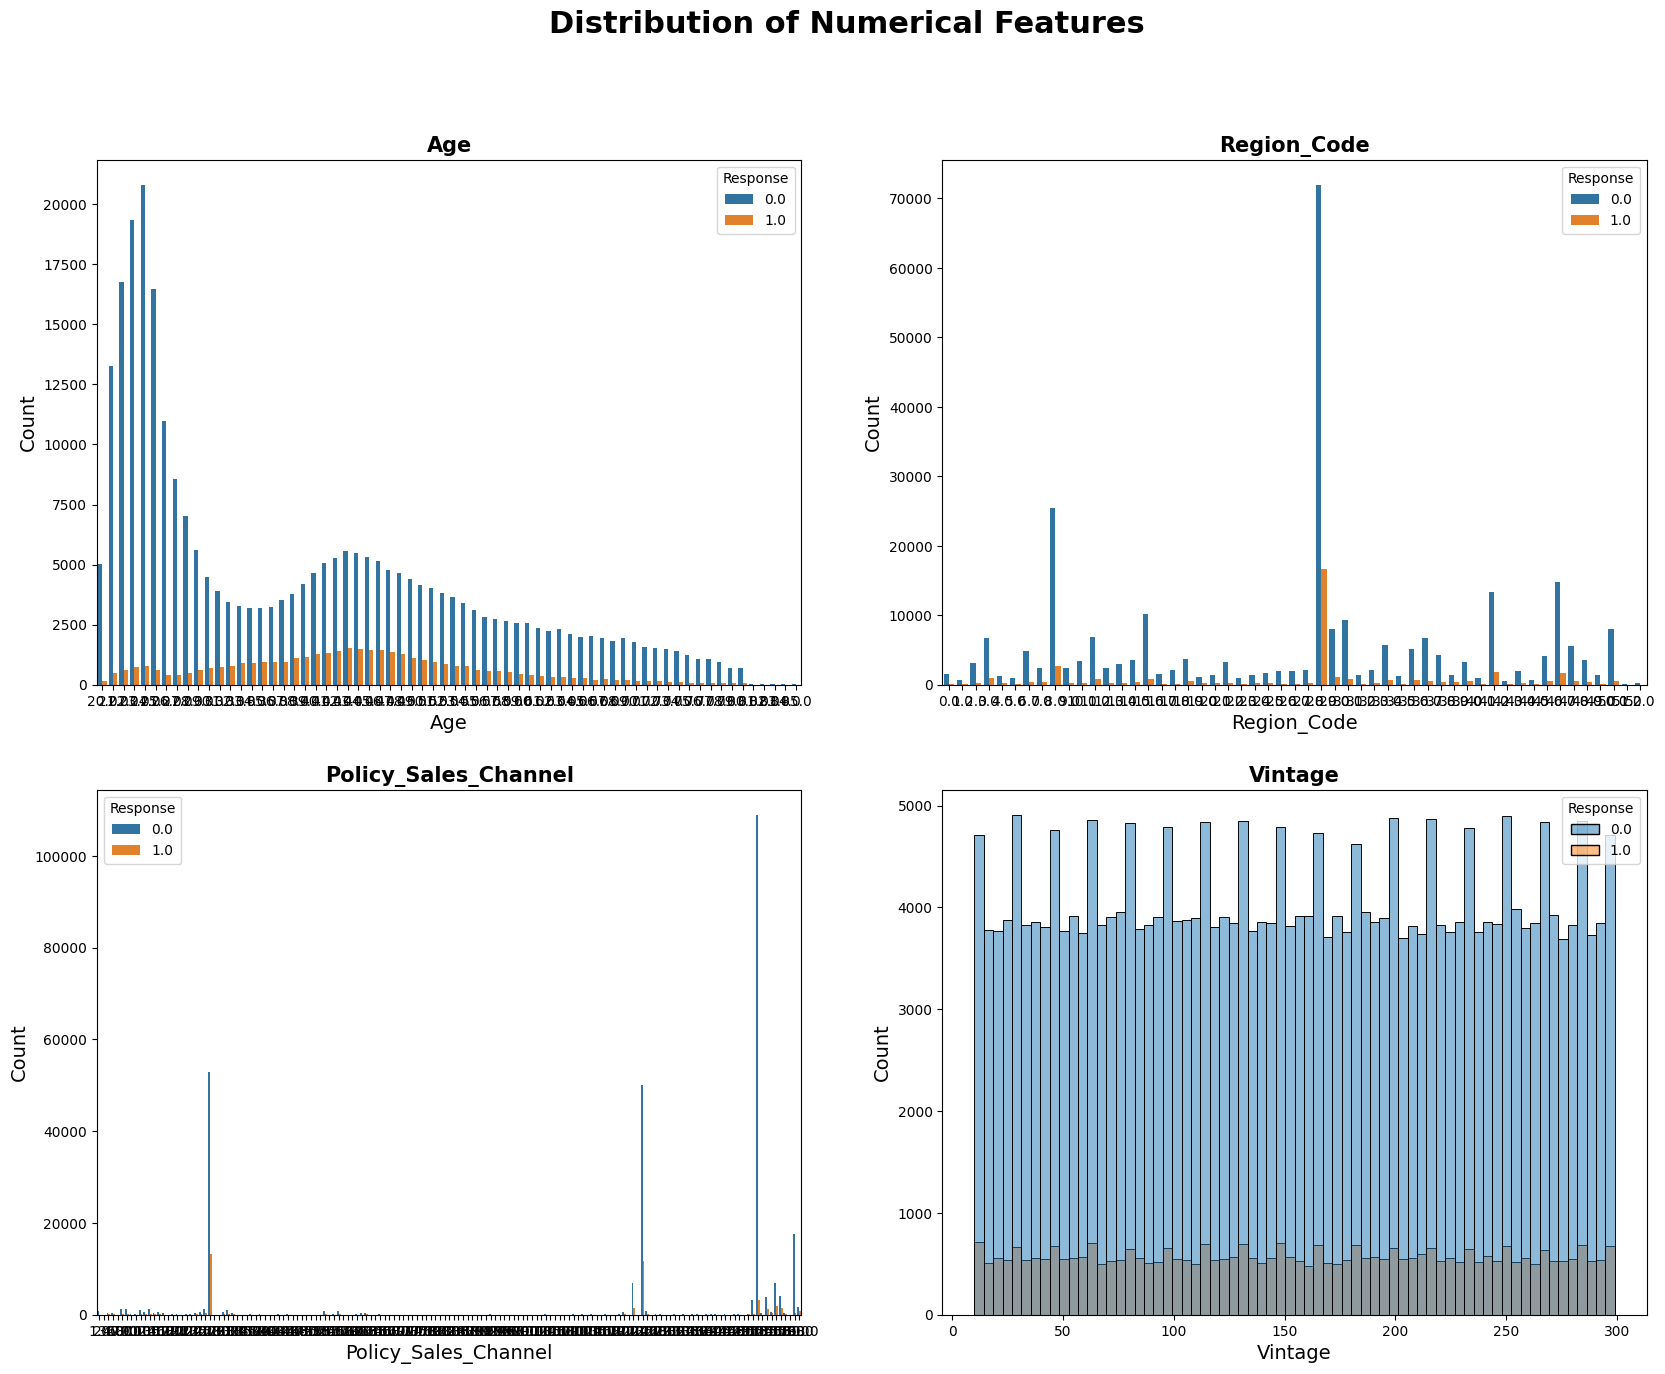

In [16]:
fig, axes = plt.subplots(2,2, figsize=(20,15))

sns.countplot(ax = axes[0][0],x = 'Age', data = df, hue='Response')
axes[0][0].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
axes[0][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
axes[0][0].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

sns.countplot(ax = axes[0][1],x = 'Region_Code', data = df, hue='Response')
axes[0][1].set_xlabel(xlabel = 'Region_Code', fontdict={'fontsize': 14})
axes[0][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
axes[0][1].set_title('Region_Code',fontdict={'fontsize': 15,  'fontweight' :'bold'})

sns.countplot(ax = axes[1][0],x = 'Policy_Sales_Channel', data = df, hue='Response')
axes[1][0].set_xlabel(xlabel = 'Policy_Sales_Channel', fontdict={'fontsize': 14})
axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
axes[1][0].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15,  'fontweight' :'bold'})

sns.histplot(ax = axes[1][1], x = df['Vintage'],data = df, hue='Response')
axes[1][1].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
axes[1][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
axes[1][1].set_title('Vintage',fontdict={'fontsize': 15,  'fontweight' :'bold'})

plt.suptitle('Distribution of Numerical Features', fontsize = 22, fontweight = 'bold' )

**Due to a huge dispersion of data in Age feature, so in order to gain better insights on Age feature, we can convert it into categories as YoungAge, MiddleAge and OldAge & Similarly, we can also categorize Region Code and Policy_Sales_Channel.**

In [17]:
# Categorizing Age feature

df['Age_Group'] = df['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')

# Categorizing Policy_Sales_Channel feature

x = df['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_A' if x>100000 else 'Channel_B' if x>74000 and x<100000 else 'Region_B' if x>11000 and x<340000 else 'Region_C')
res = dict(zip(x.keys(),x.values))
df['Region_Code_Categorical'] = df['Region_Code'].map(res)

In [18]:
df.Region_Code_Categorical.value_counts()

Region_C    297159
Region_B      2188
Name: Region_Code_Categorical, dtype: int64

Text(0.5, 0.98, 'Distribution of Categorical Features')

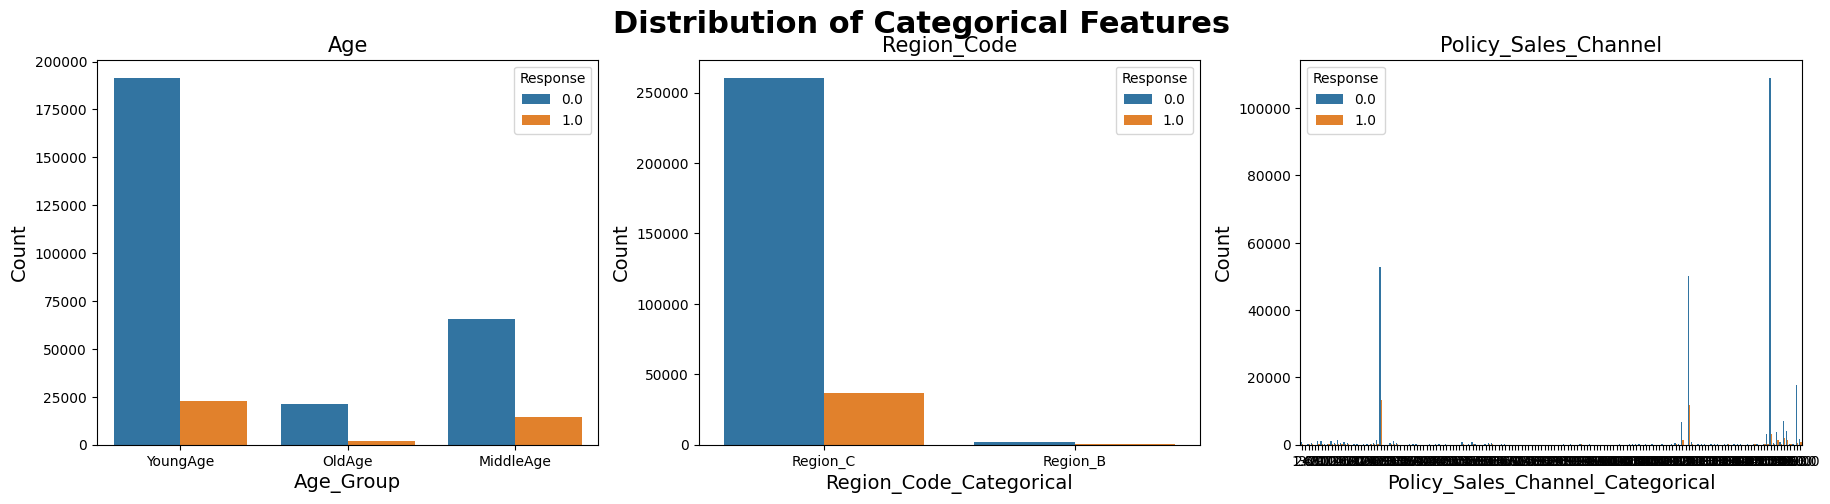

In [19]:
fig, axes = plt.subplots(1,3, figsize=(22,5))

sns.countplot(ax = axes[0],x = 'Age_Group', data = df, hue='Response')
axes[0].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
axes[0].set_title('Age', fontdict={'fontsize': 15})

sns.countplot(ax = axes[1],x = 'Region_Code_Categorical', data = df, hue='Response')
axes[1].set_xlabel(xlabel = 'Region_Code_Categorical', fontdict={'fontsize': 14})
axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
axes[1].set_title('Region_Code',fontdict={'fontsize': 15})

sns.countplot(ax = axes[2],x = 'Policy_Sales_Channel', data = df, hue='Response')
axes[2].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
axes[2].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
axes[2].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15})

plt.suptitle('Distribution of Categorical Features', fontsize = 22, fontweight = 'bold' )

Text(0.5, 1.0, 'Vehicle_Age')

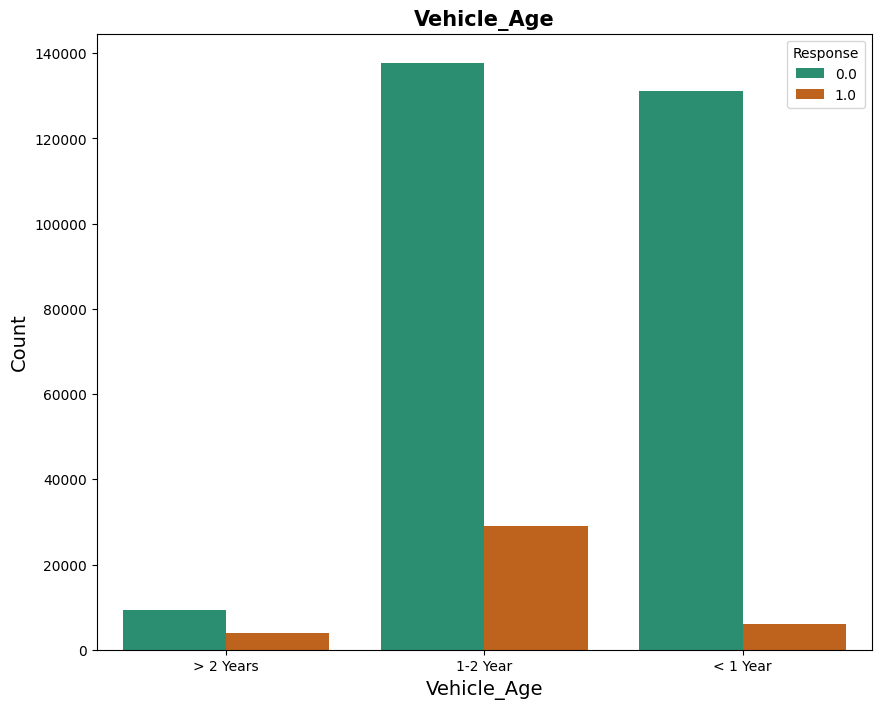

In [20]:
# Plotting vehicle age graphs

plt.figure(figsize=(10, 8))
sns.countplot(x = 'Vehicle_Age', hue='Response', data = df, palette="Dark2")
plt.xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
plt.ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
plt.title('Vehicle_Age', fontdict={'fontsize': 15, 'fontweight':'bold'})

**Customers with vechicle age 1-2 years are more likely to interested as compared to the other two & Customers with with Vehicle_Age <1 years have very less chance of buying Insurance**



# **8 - Now Finding The Age Group Distribution Over Pie**

Text(0.5, 0.98, 'Age Group Distribution')

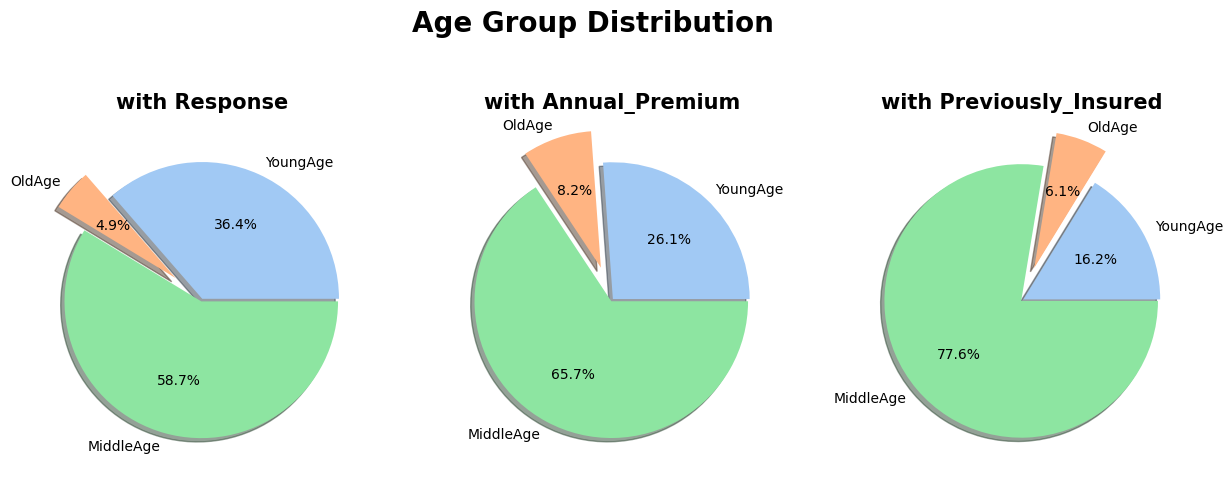

In [21]:
fig, axes = plt.subplots(1,3, figsize=(15,6))

colors = sns.color_palette('pastel')[0:4]
explode = (0.01, 0.25, 0.01)
axes[0].pie( x= df.groupby('Age_Group')['Response'].sum(),explode=explode,labels=df['Age_Group'].unique(),colors=colors, autopct='%1.1f%%',shadow=True);
axes[0].set_title('with Response', fontsize = 15, fontweight ='bold', pad=15)
axes[1].pie(x=df.groupby('Age_Group')['Annual_Premium'].sum(),explode=explode, 
labels=df['Age_Group'].unique(), colors=colors, autopct='%1.1f%%',shadow=True);
axes[1].set_title('with Annual_Premium', fontsize = 15, fontweight ='bold', pad=15)
axes[2].pie(x=df.groupby('Age_Group')['Previously_Insured'].sum(),explode=explode,labels=df['Age_Group'].unique(), colors=colors, autopct='%1.1f%%',shadow=True);
axes[2].set_title('with Previously_Insured', fontsize = 15, fontweight ='bold', pad=15)

plt.suptitle('Age Group Distribution',fontsize = 20, fontweight ='bold')

<Axes: xlabel='Previously_Insured', ylabel='count'>

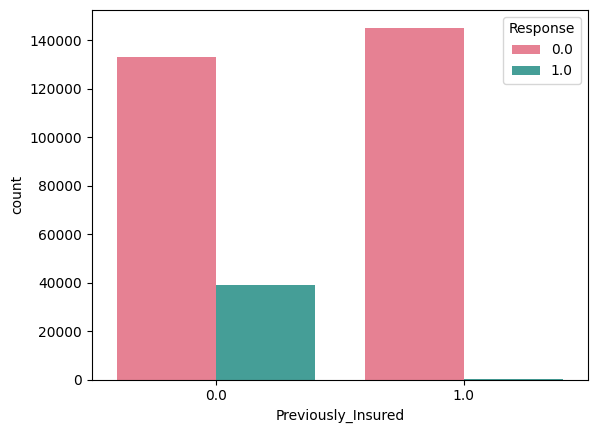

In [22]:
sns.countplot(x='Previously_Insured',hue='Response',data=df,palette='husl')


**Customer who are not perviously insured are likely to be intrested**

---




# **9 - Now lets plot the correlation matrix**

Text(0.5, 1.05, 'Correlation of Features')

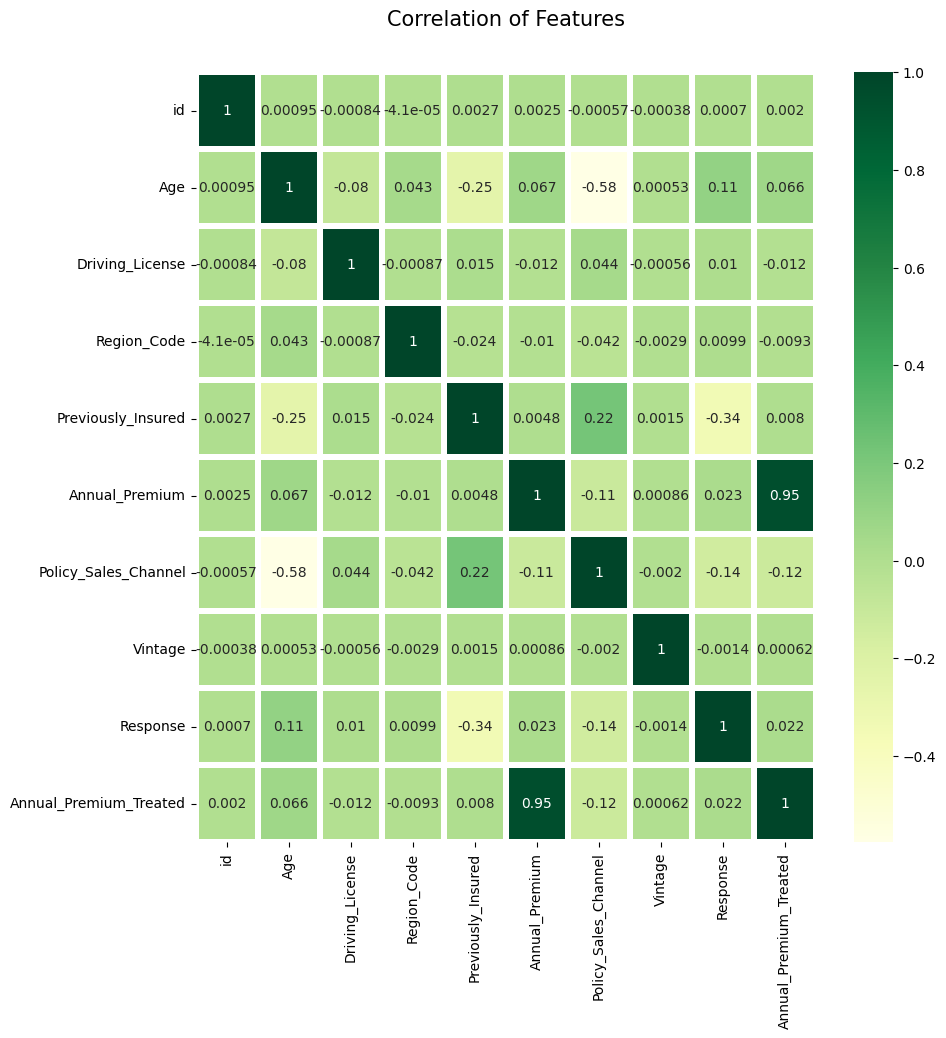

In [23]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')
plt.title("Correlation of Features", y=1.05, size=15)

## **10 - Lets Prepare Data For Modelling**

In [24]:
df.dtypes

id                           int64
Gender                      object
Age                        float64
Driving_License            float64
Region_Code                float64
Previously_Insured         float64
Vehicle_Age                 object
Vehicle_Damage              object
Annual_Premium             float64
Policy_Sales_Channel       float64
Vintage                    float64
Response                   float64
Annual_Premium_Treated     float64
Age_Group                   object
Region_Code_Categorical     object
dtype: object

In [25]:
# Using Label Encoder For Changing Categorical Values to Numerical

from sklearn.preprocessing import LabelEncoder

Encoder= LabelEncoder()
df['Gender'] = Encoder.fit_transform(df['Gender'])
df['Vehicle_Age'] = Encoder.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = Encoder.fit_transform(df['Vehicle_Damage'])

In [26]:
# Now Checking For Data Type again to verify

df.dtypes

id                           int64
Gender                       int64
Age                        float64
Driving_License            float64
Region_Code                float64
Previously_Insured         float64
Vehicle_Age                  int64
Vehicle_Damage               int64
Annual_Premium             float64
Policy_Sales_Channel       float64
Vintage                    float64
Response                   float64
Annual_Premium_Treated     float64
Age_Group                   object
Region_Code_Categorical     object
dtype: object

**Seprating dependent and independent variables**


In [27]:
# Contain all  independent variable
x=df.drop(['Response','Age_Group','Region_Code_Categorical'],axis=1) 

# Contain Dependent variable
y=df['Response']

## **11 - Feature Selection.**

[0.15922324 0.00784897 0.13667779 0.00048508 0.09024372 0.06022853
 0.01778845 0.06993307 0.11714964 0.07070487 0.15549336 0.1142233 ]


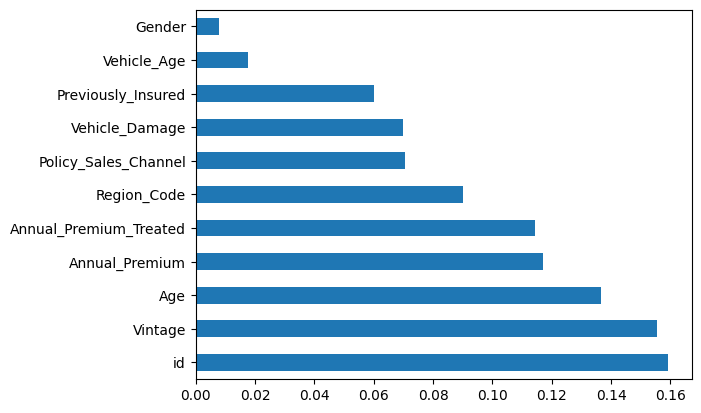

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

**Removing less important features from the data set**


In [29]:
x=x.drop(['Gender','Vehicle_Age'],axis=1)


In [42]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from imblearn.over_sampling import RandomOverSampler
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(x,y)



In [49]:
# Dividing the dataset into train and test sets
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

(389604, 10) (166974, 10) (389604,) (166974,)


## **12 - Model Selection**

**A - Logistic Regression**

In [50]:
model=LogisticRegression()
model=model.fit(xtrain,ytrain)
pred=model.predict(xtest)
lr_probability =model.predict_proba(xtest)[:,1]

acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)
print("Accuracy : ", accuracy_score(ytest,pred))
print("ROC_AUC Score:",AUC_LR)
     

Accuracy :  0.7840202666283373
ROC_AUC Score: 0.8327378006671823


In [51]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

         0.0       0.59      0.96      0.73     51473
         1.0       0.98      0.71      0.82    115501

    accuracy                           0.78    166974
   macro avg       0.78      0.83      0.78    166974
weighted avg       0.86      0.78      0.79    166974



**Plotting ROC Curve**

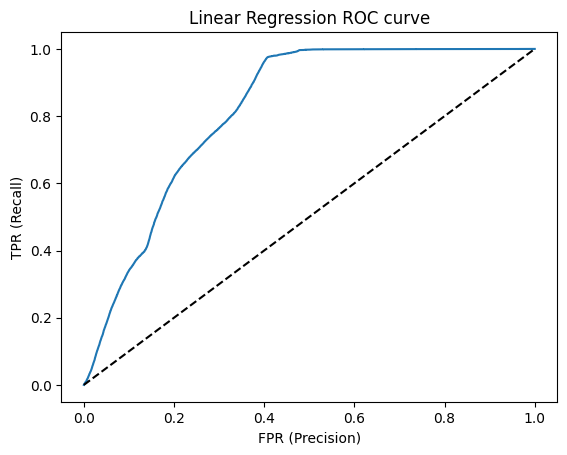

In [52]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, lr_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

**Confusion Matrix**

[[49403 33993]
 [ 2070 81508]]


<Axes: >

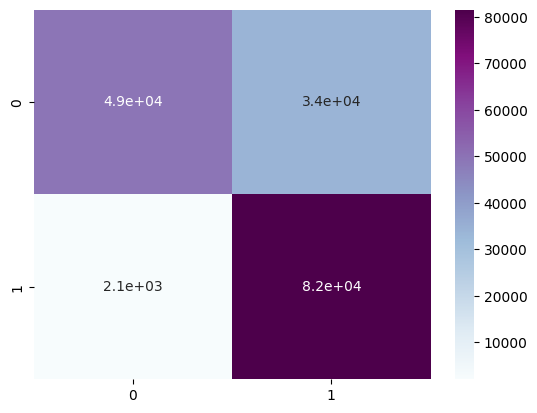

In [53]:
cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

# **B - Random Forest Classifier**

In [54]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest=randomforest.fit(xtrain, ytrain)
y_pred = randomforest.predict(xtest)
RF_probability = randomforest.predict_proba(xtest)[:,1]



AUC_RF=roc_auc_score(y_pred,ytest)
acc_rf=accuracy_score(ytest,y_pred)
recall_rf=recall_score(ytest,y_pred)
precision_rf=precision_score(ytest,y_pred)
f1score_rf=f1_score(ytest,y_pred)

print(accuracy_score(y_pred,ytest))
print("ROC_AUC Score:",AUC_RF)

0.9448297339705582
ROC_AUC Score: 0.9497022498345876


In [55]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     74746
         1.0       1.00      0.90      0.95     92228

    accuracy                           0.94    166974
   macro avg       0.94      0.95      0.94    166974
weighted avg       0.95      0.94      0.94    166974



**ROC Curve**

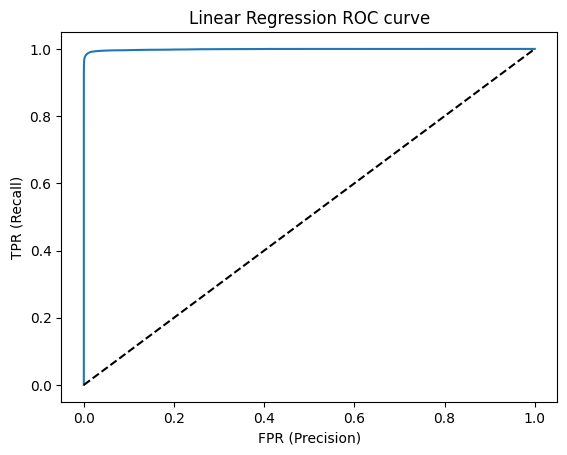

In [56]:

fpr, tpr, _ = roc_curve(ytest, RF_probability)
plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

**Confusion Matrix**

[[74465   281]
 [ 8931 83297]]


<Axes: >

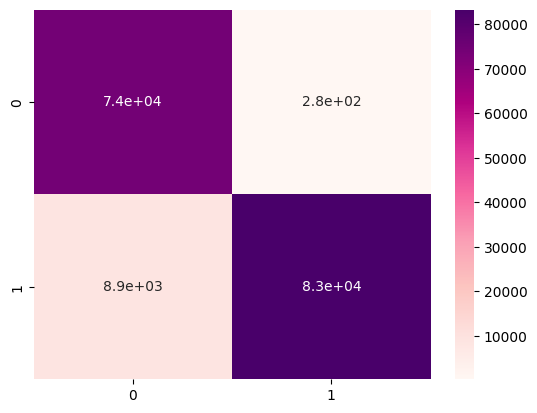

In [57]:
cm=confusion_matrix(y_pred,ytest)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

# **C - XGBClassifier**

In [58]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(xtrain, ytrain)
y_predict = XGB_fit.predict(xtest)
XGB_probability = XGB_fit.predict_proba(xtest)[:,1]

acc_xgb=accuracy_score(ytest,y_predict)
recall_xgb=recall_score(ytest,y_predict)
precision_xgb=precision_score(ytest,y_predict)
f1score_xgb=f1_score(ytest,y_predict)

AUC_xgb=roc_auc_score(y_predict,ytest)


print(accuracy_score(y_predict,ytest))
print("ROC_AUC Score:",AUC_xgb)

0.8126055553559237
ROC_AUC Score: 0.834604490952647


In [59]:
print(classification_report(y_predict,ytest))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78     62012
           1       0.94      0.75      0.83    104962

    accuracy                           0.81    166974
   macro avg       0.81      0.83      0.81    166974
weighted avg       0.85      0.81      0.82    166974



**ROC Curve**

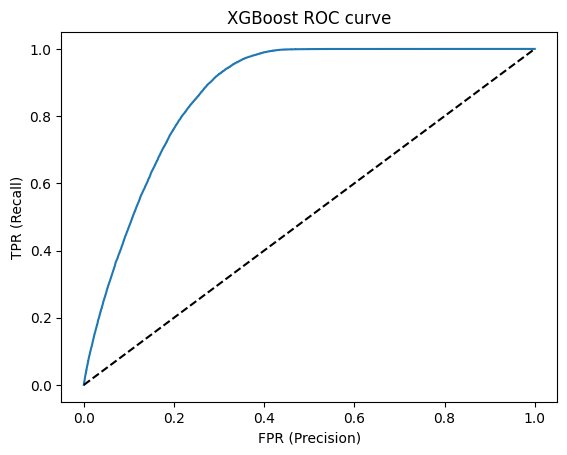

In [60]:
fpr, tpr, _ = roc_curve(ytest, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

**Confusion Matrix**

[[57059 26337]
 [ 4953 78625]]


<Axes: >

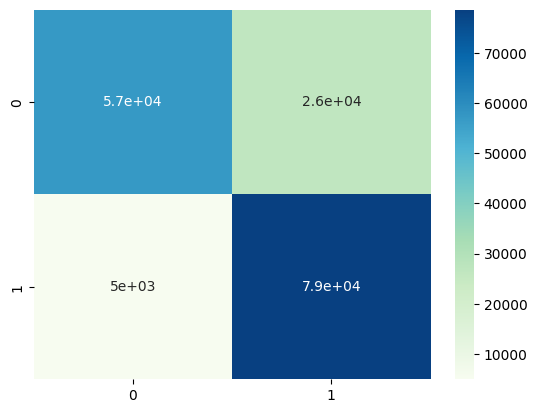

In [61]:
cm=confusion_matrix(ytest,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')


# **13 - Lets Compare All The Above 3 Model To Get Best One**





In [64]:
Cmpr=['Logistic regression','Randomforest','XGBClassifier']
data={"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=data,index=Cmpr)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.784020,0.975233,0.705691,0.818851,0.832738
Randomforest,0.944830,0.996638,0.903164,0.947601,0.949702
XGBClassifier,0.812606,0.940738,0.749081,0.834041,0.834604


**ML model created with Random Forest and XGBClassifier models performed better than Logistics Regression model**

# **14 - Conclusion**

**A - Starting from loading our dataset, we initially checked for null values and duplicates. There were no null values and duplicates so treatment of such was not required. Before data processing, we applied feature scaling techniques to normalize our data to bring all features on the same scale and make it easier to process by ML algorithms.**

**B - Through Exploratory Data Analysis, we categorized Age as YoungAge, MiddleAge, and OldAge, then we categorized the Region_Code as Region_A, Region_B, Region_C. We categorized the Policy_Sales_Channel into channel_A, channel_B, channel_C. Further, we observed that customers belonging to youngAge are more interested in vehicle response. We observed that customers having vehicles older than 2 years are more likely to be interested in vehicle insurance. Similarly, customers having damaged vehicles are more likely to be interested in vehicle insurance**
**OR We can say that the Customers of age between 30 to 60 are more likely to buy insurance.**

**C - Comparing ROC curve we can see that Random Forest model preform better. Because curves closer to the top-left corner, it indicate a better performance.**